# LOGISTIC REGRESSION

1. Data Exploration:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df1.shape

(768, 9)

In [5]:
# Summary statistics.

df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
import matplotlib.pyplot as plt

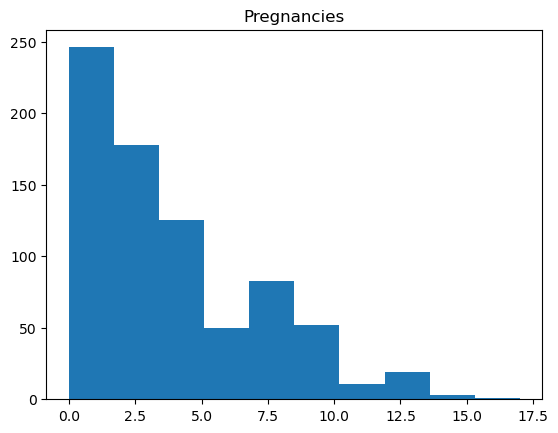

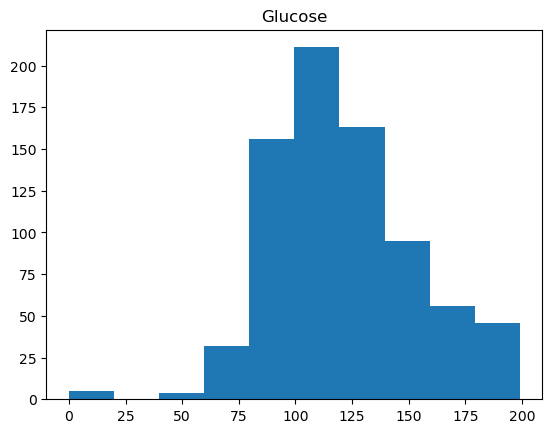

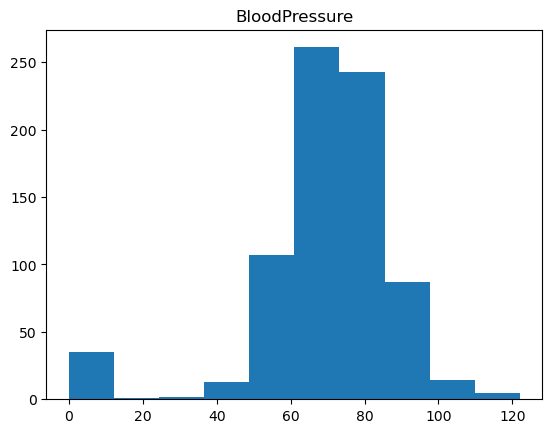

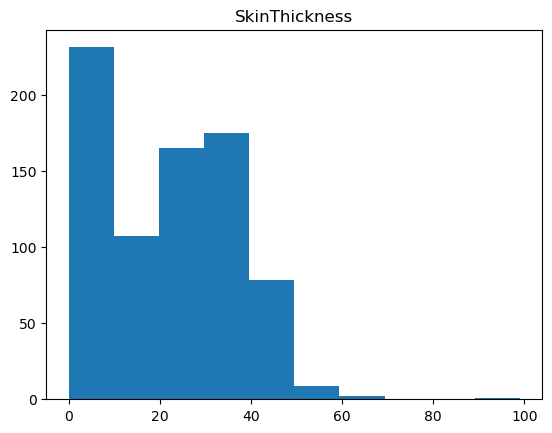

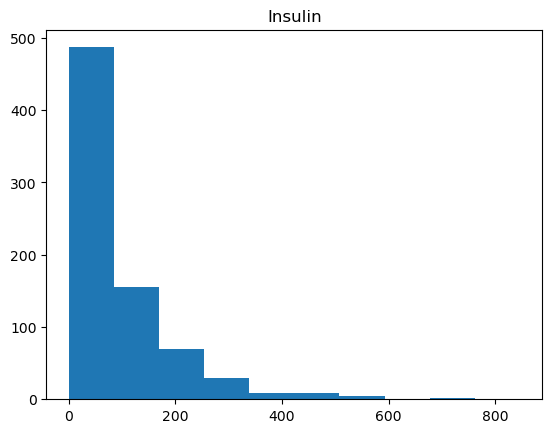

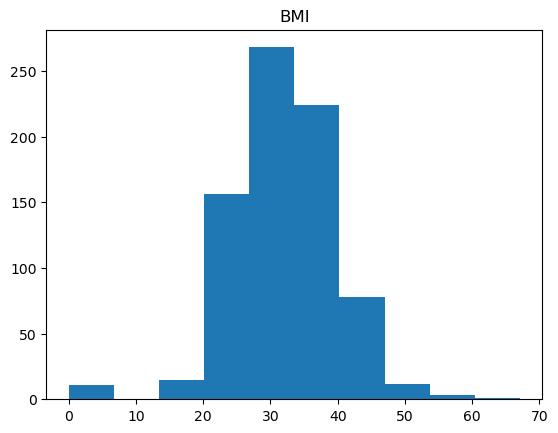

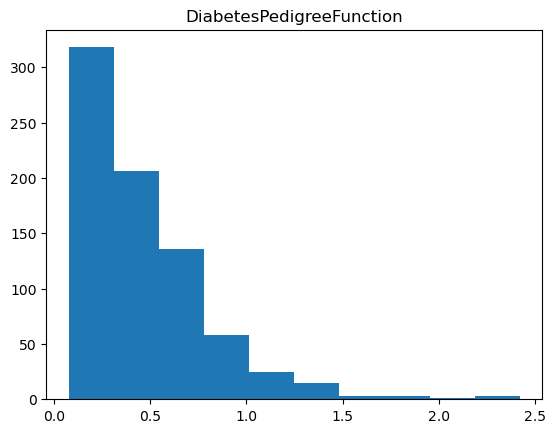

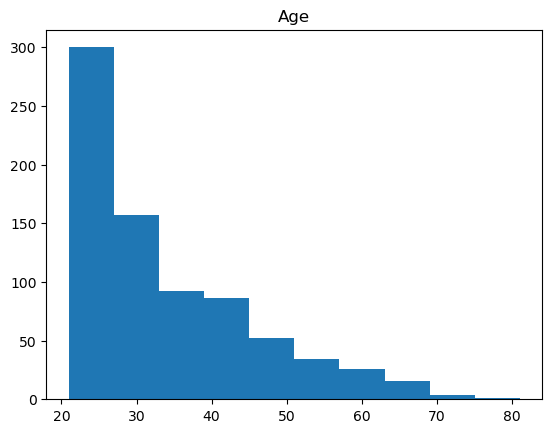

In [7]:
# Histogram for continous variables.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Outcome']

for cols in num_cols:
    plt.hist(df1[cols])
    plt.title(cols)
    plt.show()

In [8]:
# Analyzing patterns.

'''
Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age variables are Positive Skew.
Glucose, BloodPressure, BMI variables are Normally Distributed.
'''

'\nPregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age variables are Positive Skew.\nGlucose, BloodPressure, BMI variables are Normally Distributed.\n'

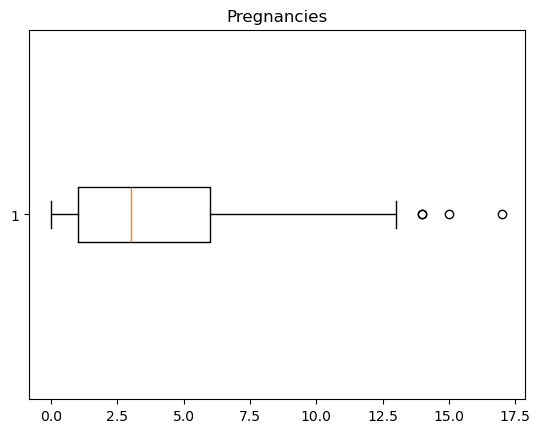

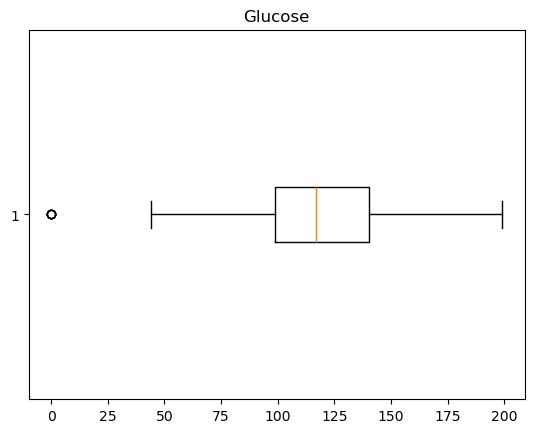

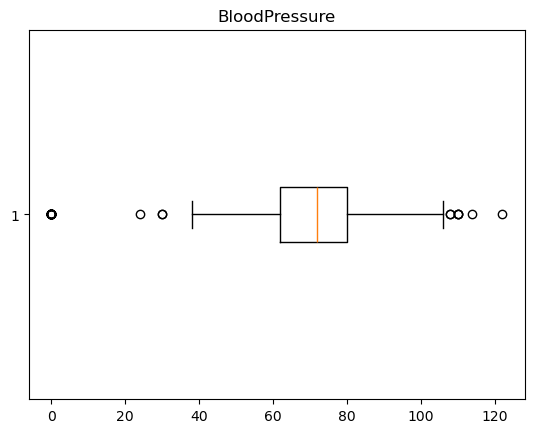

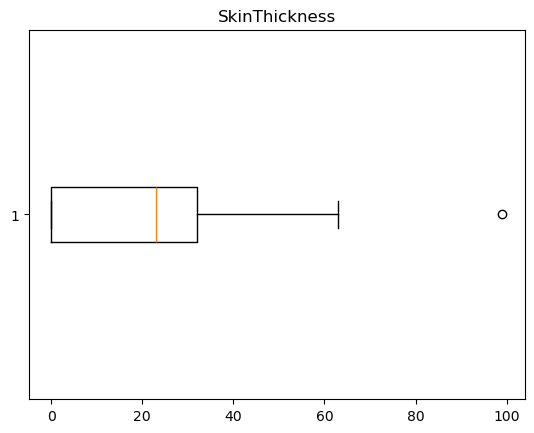

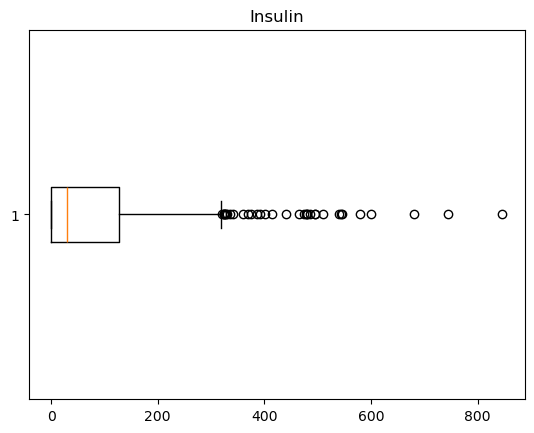

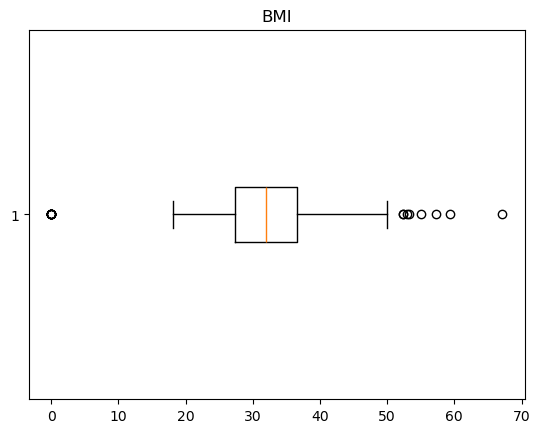

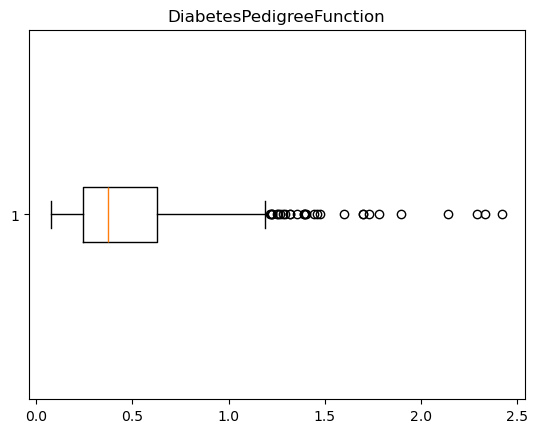

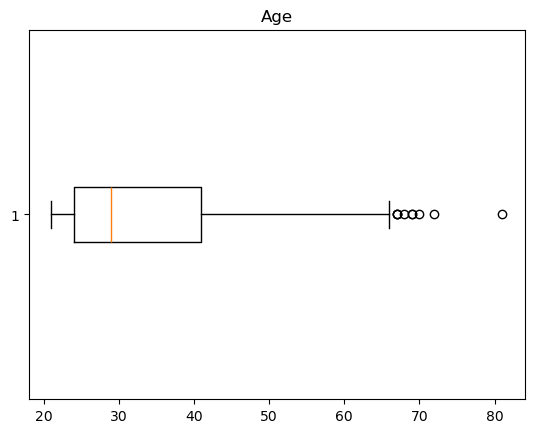

In [9]:
# Box Plot for continous variables.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Outcome']

for cols in num_cols:
    plt.boxplot(df1[cols], vert = False)
    plt.title(cols)
    plt.show()

In [10]:
# Analysing 

'''
Every variables having outliers.
'''

'\nEvery variables having outliers.\n'

In [11]:
# Outliers Treatment.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Outcome']

for cols in num_cols:
    Q1 = np.percentile(df1[cols], 25)
    Q3 = np.percentile(df1[cols], 75)
    
    IQR = Q3 - Q1
    UWL = Q3 + (1.5 * IQR)
    LWL = Q1 - (1.5 * IQR)

    df1[cols] = np.where(df1[cols] > UWL, UWL,
              np.where(df1[cols] < LWL, LWL, df1[cols]))

In [12]:
# Checking outilers after outliers treatment.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Outcome']

outlier_counts = {}

for col in num_cols:
    Q1 = np.percentile(df1[col], 25)
    Q3 = np.percentile(df1[col], 75)
    IQR = Q3 - Q1
    UWL = Q3 + (1.5 * IQR)
    LWL = Q1 - (1.5 * IQR)
    cnt = ((df1[col] < LWL) | (df1[col] > UWL)).sum()
    outlier_counts[col] = int(cnt)
    
pd.Series(outlier_counts).sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

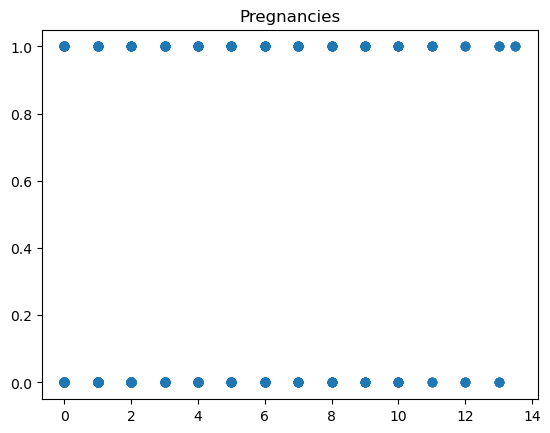

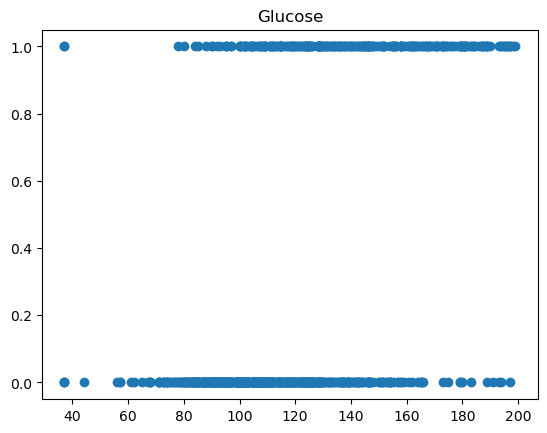

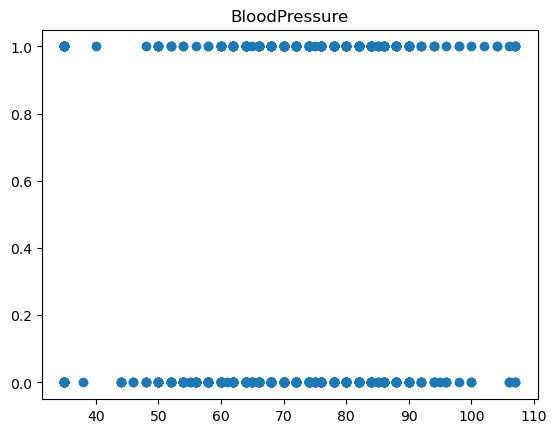

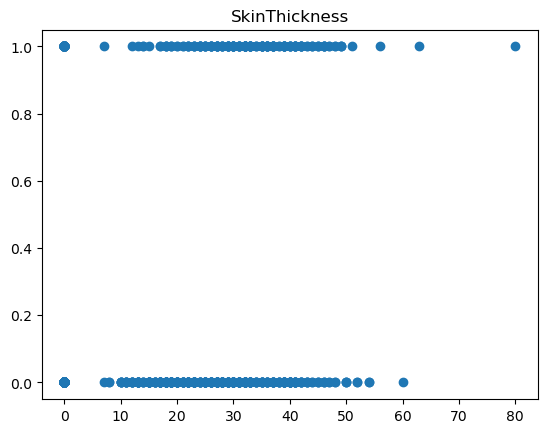

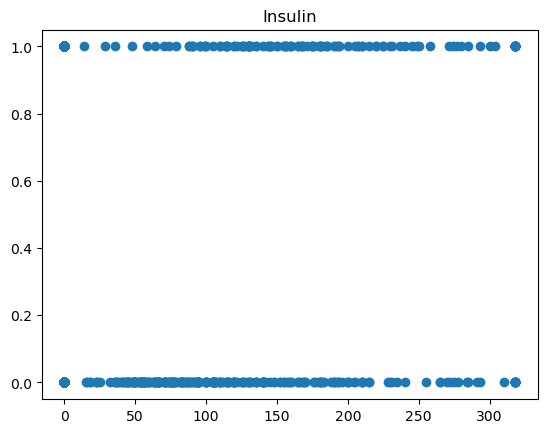

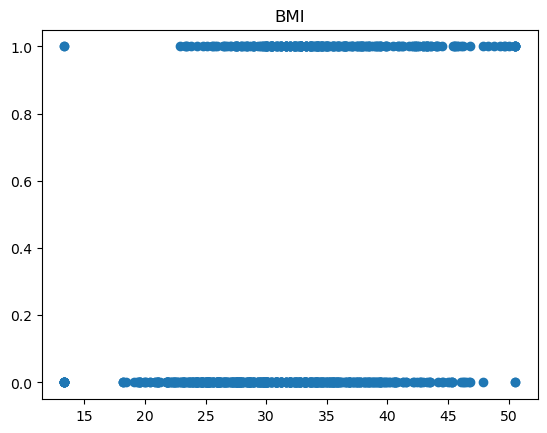

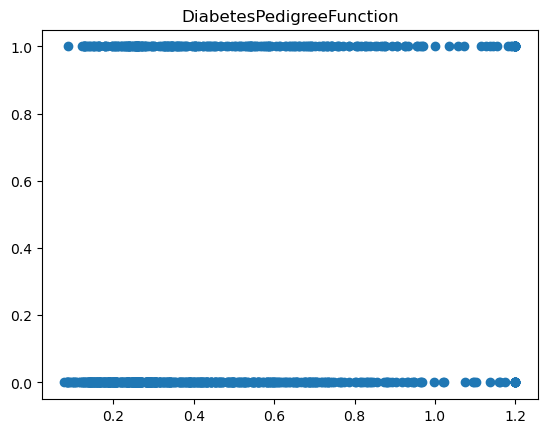

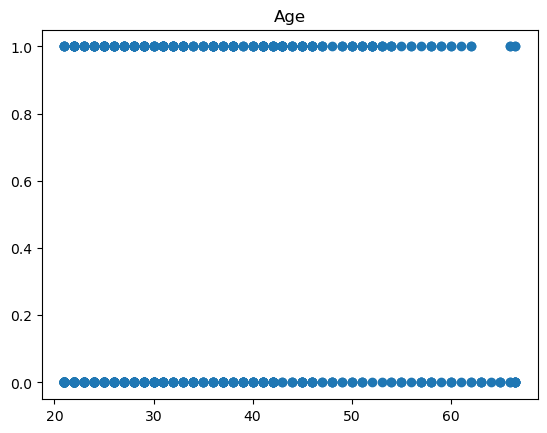

In [13]:
# Scatter plot for x variables and target variable.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [col for col in num_cols if col != 'Outcome']
for cols in num_cols:
    plt.scatter(df1[cols], df1['Outcome'])
    plt.title(cols)
    plt.show()

In [14]:
# Analyse.

'''
Our target variable is categorical, so hard to find analyse. we use different plot like correlation.
'''

'\nOur target variable is categorical, so hard to find analyse. we use different plot like correlation.\n'

In [15]:
# Correlation between all variables. 

df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


In [16]:
# Analyse.

'''
This shows which has highly or less correlation between variables.
If two x variables are higly correlated we should drop one variable, 
If x and y variables are less correlated we should drop those variables.
'''

'\nThis shows which has highly or less correlation between variables.\nIf two x variables are higly correlated we should drop one variable, \nIf x and y variables are less correlated we should drop those variables.\n'

2. Data Preprocessing:

In [17]:
# Checking any missing values are existed.

df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# Standardization.

x = df1.iloc[:, 0:8]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_new = ss.fit_transform(x)
ss_new = pd.DataFrame(ss_new)
ss_new.columns = list(x)
ss_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199


In [19]:
# concatinating dataframe and target variable.

df2 = pd.concat([ss_new, df1['Outcome']], axis = 1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1


3. Model Building:

In [20]:
# Split the variables.

x = df2.iloc[:, 0:8]
y = df2['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [22]:
# fit model.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

4. Model Evaluation:

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [26]:
# Accuracy score for test data.

acc_score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy Score for test:", np.round(acc_score_test, 3))

Accuracy Score for test: 0.753


In [27]:
# Presicion score for test data. 

ps_test = precision_score(y_test, y_pred_test)
print("Presicion Score for test:", np.round(ps_test, 3) * 100)

Presicion Score for test: 65.5


In [28]:
# Recall score for test data. 

rs_test = recall_score(y_test, y_pred_test)
print("Recall Score for test:", np.round(rs_test, 3))

Recall Score for test: 0.655


In [29]:
# F1 Score for test data. 

f1s_test = f1_score(y_test, y_pred_test)
print('F1 Score for test:', np.round(f1s_test, 3) * 100)

F1 Score for test: 65.5


In [30]:
# Roc-Auc Score.

roc_auc_test = roc_auc_score(y_test, y_pred_test)
print('ROC-AUC Score for test:', np.round(roc_auc_test, 3) * 100)

ROC-AUC Score for test: 73.1


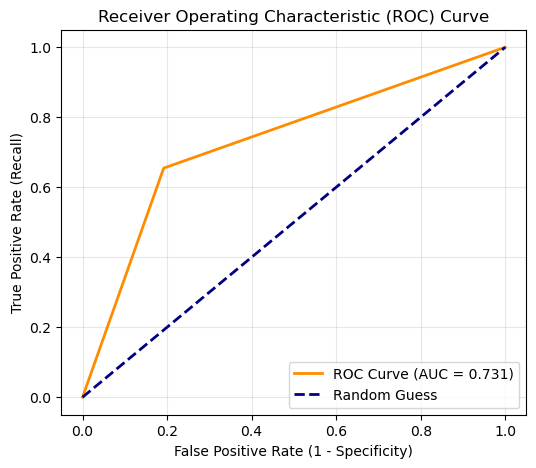

In [31]:
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, y_pred_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

5. Interpretation

In [32]:
# Coefficients
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)

                    Feature  Coefficient
1                   Glucose     1.088289
5                       BMI     0.777954
7                       Age     0.449256
6  DiabetesPedigreeFunction     0.284662
0               Pregnancies     0.200366
3             SkinThickness     0.036520
4                   Insulin    -0.218544
2             BloodPressure    -0.249305


In [33]:
# Interpret the coefficients of the logistic regression model.

'''
Positive coefficient → increases chance of diabetes (y=1).
Negative coefficient → decreases chance of diabetes (y=0).
Glucose and BMI are the most influential predictors.
'''

'\nPositive coefficient → increases chance of diabetes (y=1).\nNegative coefficient → decreases chance of diabetes (y=0).\nGlucose and BMI are the most influential predictors.\n'

In [34]:
# Discuss the significance of features in predicting the target variable (survival probability in this case).

'''
1. Most significant features:
    Glucose → strongest predictor; directly related to blood sugar.
    BMI → reflects obesity, a known diabetes risk factor.
2. Moderately significant features:
    Age and DiabetesPedigreeFunction → older age and family history increase diabetes risk.
3. Least significant features:
    SkinThickness, BloodPressure, and Insulin show weak or inverse relationships — may still help the model but have lower importance.
'''

'\n1. Most significant features:\n    Glucose → strongest predictor; directly related to blood sugar.\n    BMI → reflects obesity, a known diabetes risk factor.\n2. Moderately significant features:\n    Age and DiabetesPedigreeFunction → older age and family history increase diabetes risk.\n3. Least significant features:\n    SkinThickness, BloodPressure, and Insulin show weak or inverse relationships — may still help the model but have lower importance.\n'

In [35]:
# Interpretation:

'''
These insights can help doctors or healthcare teams focus on glucose, BMI, and family history for early diabetes screening.
'''

'\nThese insights can help doctors or healthcare teams focus on glucose, BMI, and family history for early diabetes screening.\n'

# Deployment with Streamlit:

In [36]:
# !pip install streamlit scikit-learn numpy pandas

In [37]:
import pickle

with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(ss, f)

print("Model and Scaler Saved Successfully")

Model and Scaler Saved Successfully


# interview questions
# 1) What is the difference between precision and recall? 

# Precision = Of all items predicted positive, how many are actually correct.  
# Recal = Of all items that are truly positive, how many did we correctly identify.  

# 2) What is cross-validation, and why is it important in binary classification?
# Cross-validation is a model evaluation technique where the dataset is split into multiple parts (called folds), and the model is trained and tested repeatedly on different folds.
# How it works
- The data is divided into k folds (e.g., 5 or 10).
- The model trains on k-1 folds and tests on the remaining fold.
- This process repeats until every fold has been used for testing.
- The results are averaged to give a more reliable performance estimate.
# Why it’s important in binary classification
- Prevents overfitting: Ensures the model generalizes well beyond the training data.
- Reliable performance metrics: Gives stable estimates of precision, recall, accuracy, or F1-score.
- Fair evaluation: Uses all data for both training and testing, maximizing limited datasets.
- Model comparison: Helps choose the best algorithm or hyperparameters with confidence.
